In [1]:
# mount to google drive
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)


drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  


# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/AIProject'


PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

print("PROJECT_PATH: ", PROJECT_PATH) 

!ls "{PROJECT_PATH}"

PROJECT_PATH:  /content/drive/My Drive/AIProject
intro_to_AI


In [3]:
GIT_USERNAME = 'vasyl-haievyi'
GIT_REPOSITORY = 'intro_to_AI'

GIT_PATH = f"https://github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git"

In [4]:
#execute it only first time for downloading the data
# print(GIT_PATH)

# %cd {PROJECT_PATH}
# !git clone {GIT_PATH}

In [5]:
WORKING_PATH = join(PROJECT_PATH, GIT_REPOSITORY)
WORKING_PATH

'/content/drive/My Drive/AIProject/intro_to_AI'

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:

tr = pd.read_csv(WORKING_PATH + '/data/train.csv')
ts = pd.read_csv(WORKING_PATH + '/data/test.csv')
housing_df = tr
housing_df.drop('Id', axis=1, inplace=True)

In [ ]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
na_cols = housing_df.isna().any()[housing_df.isna().any()].index.tolist()
na_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
numerical = housing_df.select_dtypes(include=['float64', 'int64']).columns.to_list()
categorical = housing_df.select_dtypes(include=['object']).columns.to_list()

In [10]:
na_num = list(set(na_cols) & set(numerical))
na_num

['MasVnrArea', 'LotFrontage', 'GarageYrBlt']

In [11]:
#GarageYrBlt available only when there is a garage, so I decided to drop it
#LotFrongate and MasVnrArea are missing for some elements, so i decided to replaces Nan with zero

housing_df.drop('GarageYrBlt', axis=1, inplace=True)
housing_df[['LotFrontage', 'MasVnrArea']] = housing_df[['LotFrontage', 'MasVnrArea']].fillna(0)

numerical = housing_df.select_dtypes(include=['float64', 'int64']).columns.to_list()


[Text(0.5, 0, 'MSSubClass'),
 Text(1.5, 0, 'LotFrontage'),
 Text(2.5, 0, 'LotArea'),
 Text(3.5, 0, 'OverallQual'),
 Text(4.5, 0, 'OverallCond'),
 Text(5.5, 0, 'YearBuilt'),
 Text(6.5, 0, 'YearRemodAdd'),
 Text(7.5, 0, 'MasVnrArea'),
 Text(8.5, 0, 'BsmtFinSF1'),
 Text(9.5, 0, 'BsmtFinSF2'),
 Text(10.5, 0, 'BsmtUnfSF'),
 Text(11.5, 0, 'TotalBsmtSF'),
 Text(12.5, 0, '1stFlrSF'),
 Text(13.5, 0, '2ndFlrSF'),
 Text(14.5, 0, 'LowQualFinSF'),
 Text(15.5, 0, 'GrLivArea'),
 Text(16.5, 0, 'BsmtFullBath'),
 Text(17.5, 0, 'BsmtHalfBath'),
 Text(18.5, 0, 'FullBath'),
 Text(19.5, 0, 'HalfBath'),
 Text(20.5, 0, 'BedroomAbvGr'),
 Text(21.5, 0, 'KitchenAbvGr'),
 Text(22.5, 0, 'TotRmsAbvGrd'),
 Text(23.5, 0, 'Fireplaces'),
 Text(24.5, 0, 'GarageCars'),
 Text(25.5, 0, 'GarageArea'),
 Text(26.5, 0, 'WoodDeckSF'),
 Text(27.5, 0, 'OpenPorchSF'),
 Text(28.5, 0, 'EnclosedPorch'),
 Text(29.5, 0, '3SsnPorch'),
 Text(30.5, 0, 'ScreenPorch'),
 Text(31.5, 0, 'PoolArea'),
 Text(32.5, 0, 'MiscVal'),
 Text(33.5, 0, 'M

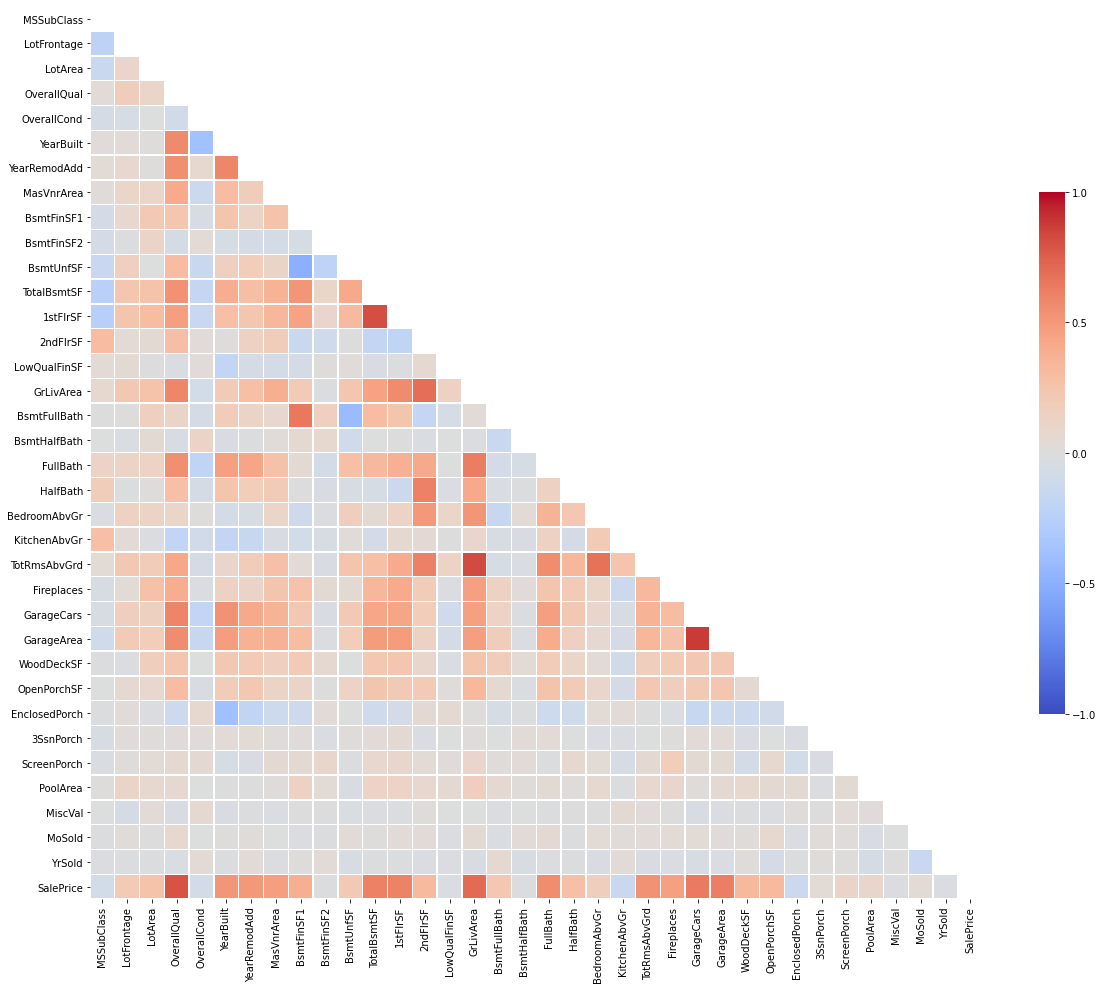

In [ ]:
corr_matrix = housing_df[numerical].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 24)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                  'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      # annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

In [12]:
drop_numerical = housing_df[numerical].keys()[np.abs(housing_df[numerical].corr()['SalePrice']) < 0.2].to_list()

print(len(drop_numerical))
print(drop_numerical)

housing_df.drop(drop_numerical, axis=1, inplace=True)

14
['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
numerical = housing_df.select_dtypes(include=['float64', 'int64']).columns.to_list()
numerical

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [14]:
na_cat = list(set(na_cols) & set(categorical))
na_cat

['BsmtFinType1',
 'GarageQual',
 'MiscFeature',
 'PoolQC',
 'Alley',
 'BsmtFinType2',
 'FireplaceQu',
 'BsmtQual',
 'Fence',
 'MasVnrType',
 'Electrical',
 'GarageType',
 'BsmtExposure',
 'BsmtCond',
 'GarageFinish',
 'GarageCond']

In [17]:
replace_NA = ['Electrical', 'FireplaceQu', 'MiscFeature', 'Fence', 'PoolQC', 'BsmtFinType2', 'Alley', 'GarageType', 'BsmtExposure', 'GarageFinish', 'BsmtQual', 'GarageCond', 'BsmtCond', 'Electrical', 'GarageQual', 'BsmtFinType1']
replace_None = ['MasVnrType']

housing_df[replace_NA] = housing_df[replace_NA].fillna("NA")
housing_df[replace_None] = housing_df[replace_None].fillna("None")


In [18]:
len(categorical)

43

In [21]:
for column in categorical:
  print("column:", column)
  plot_box_swarm(housing_df, column)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
def plot_box_swarm(df, cat_column):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(15, 20))
 
    # add title to plot
    plt.title('SalePrice and ' + cat_column)

    series = df[[cat_column, 'SalePrice']].groupby(cat_column)['SalePrice'].apply(np.array)
    data = series.array.to_numpy()
    labels = series.index.to_numpy()
    print(labels)

    # plot data on swarmplot and boxplot
    sns.swarmplot(data=data, color=".25")
    ax = sns.boxplot(data=data)
 
    # y-axis label
    ax.set(ylabel='SalePrice')
 
    # write labels with number of elements
    ax.set_xticklabels(["{} (n={})".format(l, len(data[x])) for x, l in enumerate(labels)], rotation=45)
 
    plt.show()

In [22]:
drop_categorical = ['Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'ExterCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType']

housing_df.drop(drop_categorical, axis=1, inplace=True)

In [23]:
categorical = housing_df.select_dtypes(include=['object']).columns.to_list()
categorical

['MSZoning',
 'LotShape',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PoolQC',
 'SaleCondition']

In [24]:
#Train/Test split

y = housing_df.SalePrice.to_numpy().reshape((housing_df.shape[0], 1))
housing_df.drop('SalePrice', axis=1, inplace=True)

numerical = housing_df.select_dtypes(include=['float64', 'int64']).columns.to_list()

one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X = np.hstack((housing_df[numerical],
               one_hot_encoder.fit_transform(housing_df[categorical])))

print(X.shape)
print(y.shape)

(1460, 156)
(1460, 1)


In [25]:
# Prepocess data for Kaggle submission
ts = pd.read_csv(WORKING_PATH + '/data/test.csv')

ts.drop('Id', axis=1, inplace=True)

ts.drop('GarageYrBlt', axis=1, inplace=True)
ts[['LotFrontage', 'MasVnrArea']] = ts[['LotFrontage', 'MasVnrArea']].fillna(0)
ts[numerical] = ts[numerical].fillna(0)

ts.drop(drop_numerical, axis=1, inplace=True)


ts[replace_None] = ts[replace_None].fillna("None")
ts[categorical] = ts[categorical].fillna("NA")

ts.drop(drop_categorical, axis=1, inplace=True)

numerical = ts.select_dtypes(include=['float64', 'int64']).columns.to_list()

SubmissionTestData = np.hstack((ts[numerical],
               one_hot_encoder.transform(ts[categorical])))

print(SubmissionTestData.shape)

(1459, 156)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25)

In [27]:
X_train.shape

(1095, 156)

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [29]:
kfold = KFold(n_splits=5)

models = []

In [30]:
y.reshape((y.shape[0],))

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [31]:
#LinearRegression
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearRegression())])
param_grid = {
            'preprocessing': [StandardScaler(), None]
}

rd_forest_grid = GridSearchCV(pipe, param_grid, cv=kfold)

rd_forest_grid.fit(X_train, y_train)

models.append(rd_forest_grid.best_estimator_)

In [ ]:
# #SVM rbf
# pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
# param_grid = {
#             'preprocessing': [StandardScaler(), None],
#             'classifier__gamma': [ 0.1, 1, 10, 100],
#             'classifier__C': [ 0.1, 1, 10, 100]
# }

# svc_grid = GridSearchCV(pipe, param_grid, cv=kfold)

# svc_grid.fit(X_train, y_train)

# models.append(svc_grid.best_estimator_)


In [32]:
#Random Forest
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestRegressor())])
param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [20, 40, 80, 120],
            'classifier__max_depth': [2, 4, 10]
}

rd_forest_grid = GridSearchCV(pipe, param_grid, cv=kfold)

rd_forest_grid.fit(X_train, y_train)

models.append(rd_forest_grid.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [33]:
#Decision Tree
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeRegressor())])
param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [2, 5, 10, 20, 40]
}

dec_tree_grid = GridSearchCV(pipe, param_grid, cv=kfold)

dec_tree_grid.fit(X_train, y_train)

models.append(dec_tree_grid.best_estimator_)

In [34]:
#AdaBoost
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostRegressor())])
param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__learning_rate': [0.01, 0.1, 1, 5, 10],
            'classifier__n_estimators' : [10, 50, 80, 120]
}

ada_boost_grid = GridSearchCV(pipe, param_grid, cv=kfold)

ada_boost_grid.fit(X_train, y_train)

models.append(ada_boost_grid.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [35]:
# ExtraTrees
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesRegressor())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [10,50,100],
            'classifier__random_state': [0, 42]
}

extra_tree_grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
extra_tree_grid.fit(X_train, y_train)
models.append(extra_tree_grid.best_estimator_)


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [36]:
# GradientBoosting
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingRegressor())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [10,50,100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
}

grad_boost_grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grad_boost_grid.fit(X_train, y_train)
models.append(grad_boost_grid.best_estimator_)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [37]:
#Ridge
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', Ridge())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__alpha': [0.1, 1, 10]
}

ridge_grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
ridge_grid.fit(X_train, y_train)
models.append(ridge_grid.best_estimator_)

In [38]:
#Lasso
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', Lasso())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__alpha': [0.1, 1, 10]
}

lasso_grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
lasso_grid.fit(X_train, y_train)
models.append(lasso_grid.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215342926537.90173, tolerance: 567509182.2365562
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41726264801.790955, tolerance: 565734533.3604109
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141561970995.67645, tolerance: 549936963.2513422
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237206944

In [39]:
from keras.callbacks import EarlyStopping, History, ModelCheckpoint, LearningRateScheduler
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [41]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
SubmissionTestData_scaled = scaler.transform(SubmissionTestData)

In [42]:
#Simple sequential model with relu activation function

simple_history = History()

simple_model = Sequential()

simple_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
simple_model.add(Dense(64,  activation='relu'))
simple_model.add(Dense(32,  activation='relu'))
simple_model.add(Dense(16,  activation='relu'))
simple_model.add(Dense(1))

simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                10048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,833
Trainable params: 16,833
Non-trainable params: 0
_________________________________________________________________


In [43]:

save_callback = ModelCheckpoint(join(WORKING_PATH, "simple_model.h5py"),monitor='val_mse', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=80, monitor='val_mse')


simple_model.compile(optimizer='adam',
              loss='mse', metrics=['mse', 'mae'])

simple_history = simple_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stopping, save_callback])

Train on 1095 samples, validate on 365 samples
Epoch 1/500
1095/1095 [==============================] - 0s 410us/step - loss: 38124706289.5050 - mse: 38124707840.0000 - mae: 178683.2188 - val_loss: 34064203001.6877 - val_mse: 34064203776.0000 - val_mae: 167363.5938

Epoch 00001: val_mse improved from inf to 34064203776.00000, saving model to /content/drive/My Drive/AIProject/intro_to_AI/simple_model.h5py
Epoch 2/500
1095/1095 [==============================] - 0s 66us/step - loss: 27406266657.8995 - mse: 27406264320.0000 - mae: 146216.7969 - val_loss: 13762495269.1726 - val_mse: 13762495488.0000 - val_mae: 89666.6172

Epoch 00002: val_mse improved from 34064203776.00000 to 13762495488.00000, saving model to /content/drive/My Drive/AIProject/intro_to_AI/simple_model.h5py
Epoch 3/500
1095/1095 [==============================] - 0s 64us/step - loss: 10602944180.4858 - mse: 10602943488.0000 - mae: 62987.8594 - val_loss: 8861714102.3562 - val_mse: 8861714432.0000 - val_mae: 48525.5742

Epoc

In [45]:
models.append(simple_model)

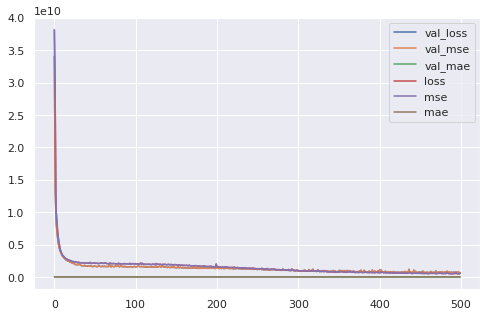

0.8963688634929123

In [44]:
from matplotlib import pyplot as plt

pd.DataFrame(simple_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

metrics.r2_score(y_test, simple_model.predict(X_test))

In [62]:
#Simple sequential model recreation for use with scaled data

simple_history_scaled = History()

simple_model = Sequential()

simple_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
simple_model.add(Dense(64,  activation='relu'))
simple_model.add(Dense(32,  activation='relu'))
simple_model.add(Dense(16,  activation='relu'))
simple_model.add(Dense(1))

simple_model.summary()


save_callback = ModelCheckpoint(join(WORKING_PATH, "simple_model_scaled.h5py"),monitor='val_mse', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=80, monitor='val_mse')


simple_model.compile(optimizer='adam',
              loss='mse', metrics=['mse', 'mae'])

simple_history_scaled = simple_model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=500, callbacks=[early_stopping, save_callback])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                10048     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 16,833
Trainable params: 16,833
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/500
1095/1095 [==============================] - 0s 190us/ste

In [64]:
models[9] = simple_model

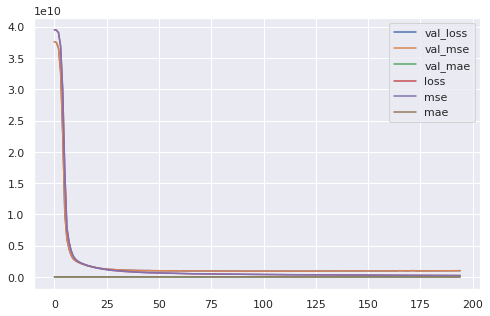

0.8407160264881484

In [63]:
from matplotlib import pyplot as plt

pd.DataFrame(simple_history_scaled.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

metrics.r2_score(y_test, simple_model.predict(X_test_scaled))

In [65]:
#More complicated model
cmpl_history = History()

cmpl_model = Sequential()

cmpl_model.add(Dense(256, input_shape=(X_train.shape[1],),  kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(128, kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(64, kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(32, kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(1,  kernel_initializer='normal'))

cmpl_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               40192     
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
activation_14 (Activation)   (None, 128)              

In [66]:
save_callback = ModelCheckpoint(join(WORKING_PATH, "cmpl_model.h5py"),monitor='val_mse', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=80, monitor='val_mse')


cmpl_model.compile(optimizer='adam',
              loss='mse', metrics=['mae', 'mse'])

cmpl_history = simple_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=500, callbacks=[save_callback, early_stopping])

Train on 1095 samples, validate on 365 samples
Epoch 1/500
1095/1095 [==============================] - 0s 58us/step - loss: 8900261362218976.0000 - mse: 8900261548392448.0000 - mae: 63650136.0000 - val_loss: 765735823807934.1250 - val_mse: 765735827668992.0000 - val_mae: 18748500.0000

Epoch 00001: val_mse improved from inf to 765735827668992.00000, saving model to /content/drive/My Drive/AIProject/intro_to_AI/cmpl_model.h5py
Epoch 2/500
1095/1095 [==============================] - 0s 66us/step - loss: 667975925776638.3750 - mse: 667975929561088.0000 - mae: 14740299.0000 - val_loss: 331603829307868.9375 - val_mse: 331603821723648.0000 - val_mae: 10778633.0000

Epoch 00002: val_mse improved from 765735827668992.00000 to 331603821723648.00000, saving model to /content/drive/My Drive/AIProject/intro_to_AI/cmpl_model.h5py
Epoch 3/500
1095/1095 [==============================] - 0s 72us/step - loss: 349764876079167.5625 - mse: 349764889608192.0000 - mae: 10417491.0000 - val_loss: 236414766

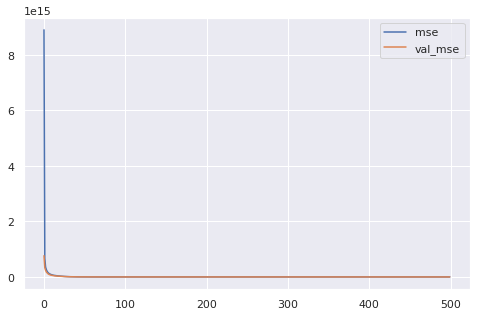

-4.987071395784632

In [67]:
from matplotlib import pyplot as plt

pd.DataFrame({ 'mse' : cmpl_history.history['mse'],
               'val_mse' : cmpl_history.history['val_mse']}).plot(figsize=(8, 5))

plt.grid(True)
plt.show()

metrics.r2_score(y_test, cmpl_model.predict(X_test))

In [68]:
models[10] = cmpl_model

In [69]:
#More complicated model With scaled data
cmpl_history = History()

cmpl_model = Sequential()

cmpl_model.add(Dense(256, input_shape=(X_train.shape[1],),  kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(128, kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(64, kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(32, kernel_initializer='normal'))
cmpl_model.add(BatchNormalization())
cmpl_model.add(Activation('relu'))
cmpl_model.add(Dropout(0.3))

cmpl_model.add(Dense(1,  kernel_initializer='normal'))

cmpl_model.summary()


save_callback = ModelCheckpoint(join(WORKING_PATH, "cmpl_model_scaled.h5py"),monitor='val_mse', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=80, monitor='val_mse')


cmpl_model.compile(optimizer='adam',
              loss='mse', metrics=['mae', 'mse'])

cmpl_history_scaled = simple_model.fit(X_train_scaled, y_train, batch_size=32, validation_data=(X_test_scaled, y_test), epochs=500, callbacks=[save_callback, early_stopping])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               40192     
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
activation_18 (Activation)   (None, 128)              

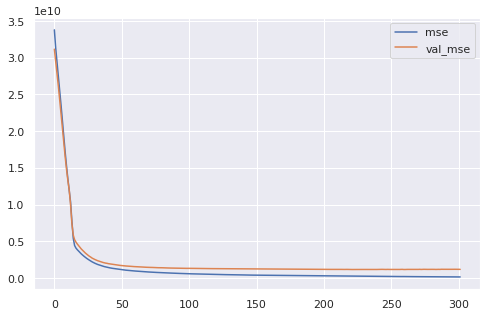

-4.9871394476836475

In [70]:
from matplotlib import pyplot as plt

pd.DataFrame({ 'mse' : cmpl_history_scaled.history['mse'],
               'val_mse' : cmpl_history_scaled.history['val_mse']}).plot(figsize=(8, 5))

plt.grid(True)
plt.show()

metrics.r2_score(y_test, cmpl_model.predict(X_test_scaled))

In [71]:
models[11] = cmpl_model

In [72]:
mean_squared_error_score = []
root_mean_squared_error_score = []
mean_absolute_error_score = []
r2_score = []

for index, model in enumerate(models):
  
  if index in (9, 11):
    test_data = X_test_scaled
  else:
    test_data = X_test

  mean_squared_error_score.append(metrics.mean_squared_error(y_test, model.predict(test_data)))
  mean_absolute_error_score.append(metrics.mean_absolute_error(y_test, model.predict(test_data)))
  r2_score.append(metrics.r2_score(y_test, model.predict(test_data)))

names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost', 'Extra Trees', 'Gradient Boosting', 'Ridge', 'Lasso', 'Simple NN', 'Simple NN Scaled', 'Complex NN', 'Complex NN Scaled']

d = {'mean_squared_error': mean_squared_error_score,
     'root_mean_squared_error': np.sqrt(mean_squared_error_score),
     'mean_absolute_error': mean_absolute_error_score, 
     'r2_score' : r2_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df

,Method,mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score
0,Linear Regression,1.223573e+09,34979.615078,20342.806716,0.805250
1,Random Forest,7.440773e+08,27277.779793,17638.134436,0.881569
2,Decision Tree,1.512855e+09,38895.434885,27385.452306,0.759207
3,AdaBoost,1.220094e+09,34929.848474,25537.437011,0.805804
4,Extra Trees,7.380447e+08,27166.978327,17550.547534,0.882529
5,Gradient Boosting,6.459306e+08,25415.164581,16159.279166,0.897191
6,Ridge,8.829258e+08,29714.067443,18704.988007,0.859469
7,Lasso,1.170220e+09,34208.482427,19869.628706,0.813742
8,Simple NN,6.510934e+08,25516.531958,17058.246361,0.896369
9,Simple NN Scaled,1.174978e+09,34277.951988,21893.639052,0.812985


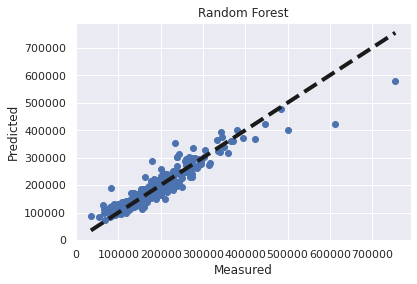

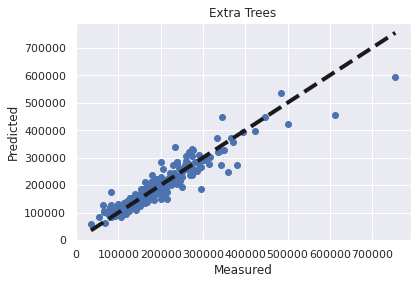

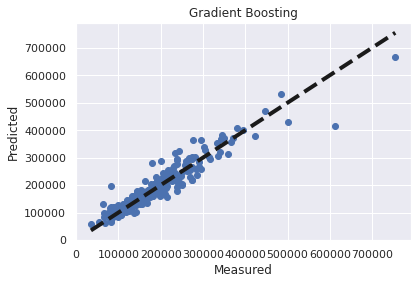

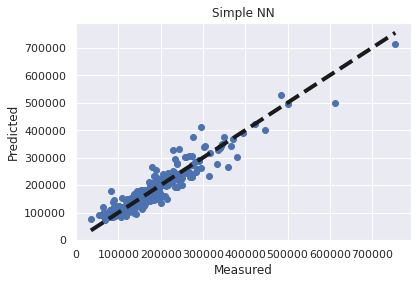

In [76]:
for name, model in [('Random Forest', models[1]), ('Extra Trees', models[4]), ('Gradient Boosting', models[5]), ('Simple NN', models[8])]:

  predicted = model.predict(X_test)

  fig, ax = plt.subplots()
  ax.scatter(y_test, predicted)
  ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  plt.title(name)
  plt.show()

In [86]:
predicted = models[8].predict(SubmissionTestData)
sub_df = pd.DataFrame(predicted)
sub_df.index += 1461
sub_df.columns = ['SalePrice']
sub_df.index.name = 'Id'
print(sub_df)
sub_df.to_csv(join(WORKING_PATH, "NNSubmission.csv"))

          SalePrice
Id                 
1461  107761.179688
1462  161658.296875
1463  201338.343750
1464  188893.468750
1465  173927.578125
...             ...
2915   82735.375000
2916   88666.632812
2917  165347.734375
2918  115745.414062
2919  214329.406250

[1459 rows x 1 columns]


![alt text](https://drive.google.com/uc?id=1kVfEESmvXxRzkjiybK7pOnTKMSEWFtBn)
